In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#other
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline


In [41]:
X = np.asmatrix(pd.read_csv("../results/fifa_features.csv"))
print("The shape of the feature matrix is: ", X.shape, "\nEach row representing a player, each column representing a feature.")

y = np.asarray(pd.read_csv("../results/fifa_target.csv"))
print("The shape of the target matrix is : ", y.shape, "\nEach row representing a player, column values are respective leagues.")
y = y.flatten()

The shape of the feature matrix is:  (5314, 166) 
Each row representing a player, each column representing a feature.
The shape of the target matrix is :  (5314, 1) 
Each row representing a player, column values are respective leagues.


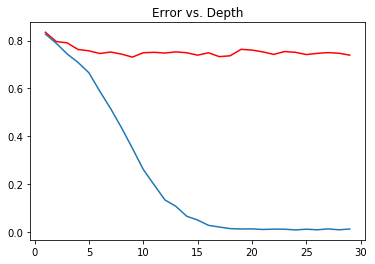

In [54]:
#Creating train-test split and testing random forests with different depth
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.30, random_state=1)



train_err_list = []
val_err_list = []
index_list = []

for i in range(1, 30):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(Xtrain, ytrain)
    train_err = 1-clf.score(Xtrain,ytrain)
    val_err = 1-clf.score(Xval, yval)
    train_err_list.append(train_err)
    val_err_list.append(val_err)
    index_list.append(i)
    
#plotting the two errors in relation to tree_depth. 
# test error: red 
# train error: blue

plt.plot(index_list, val_err_list,"r", index_list, train_err_list)
plt.title('Error vs. Depth')
    


In [51]:
Xval.shape

(3719,)